Problem Statement-
Bike-sharing system are meant to rent the bicycle and return to the different place for the bike sharing purpose in Washington DC.
You are provided with rental data spanning for 2 years. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
# to show the figures in the jupyter notebook itself
%matplotlib inline 

In [73]:
train = pd.read_csv('train_bikes.csv', parse_dates=['datetime']) # loading the training data

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:

train.tail() # looking at the training data from end


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


<Axes: xlabel='season', ylabel='count'>

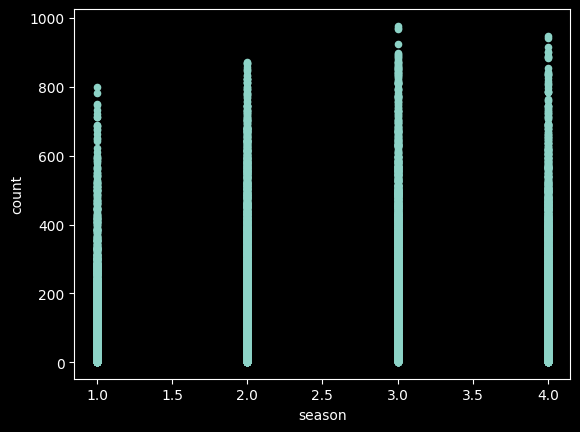

In [4]:
train.plot.scatter(x = 'season', y = 'count') # plotting the counts based on the season

<Axes: xlabel='holiday', ylabel='count'>

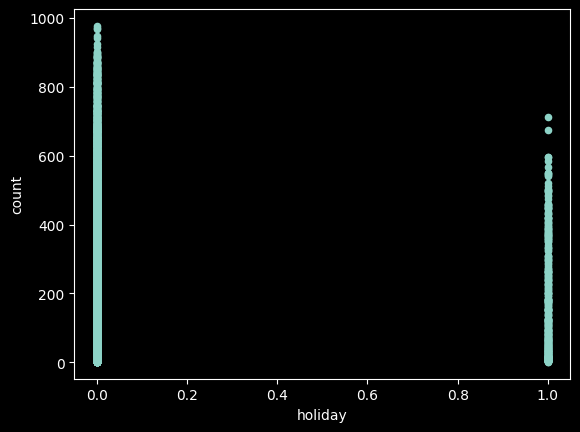

In [5]:
train.plot.scatter(x = 'holiday', y = 'count') # plotting the counts based on the holidays

<Axes: xlabel='workingday', ylabel='count'>

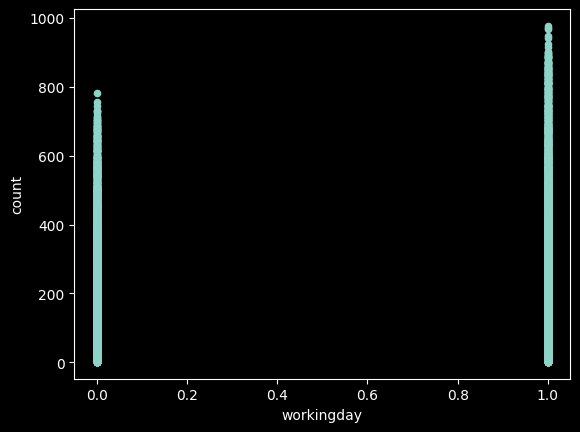

In [6]:
train.plot.scatter(x = 'workingday', y = 'count') # plotting the counts based on working day

<Axes: xlabel='weather', ylabel='count'>

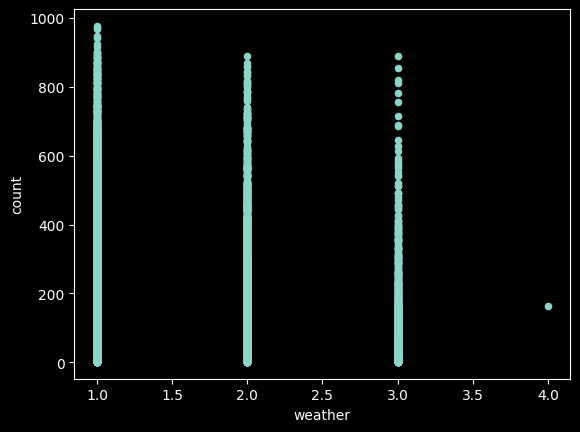

In [7]:
train.plot.scatter(x = 'weather', y = 'count') # plotting the counts based on the weather

<Axes: xlabel='temp', ylabel='count'>

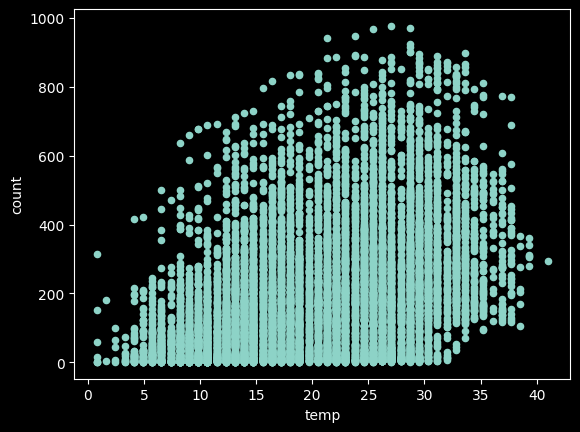

In [8]:
train.plot.scatter(x = 'temp', y = 'count') # plotting the counts based on the temparature

<Axes: xlabel='atemp', ylabel='count'>

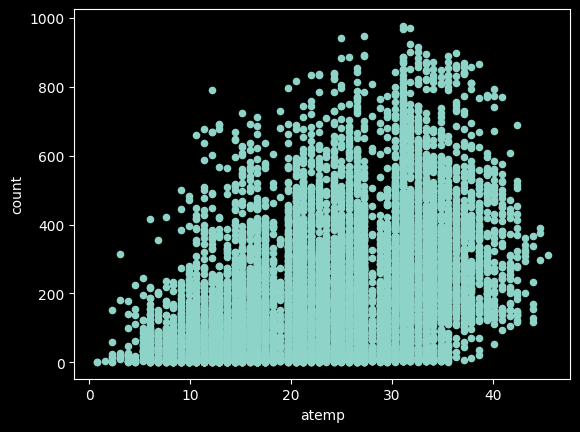

In [9]:
train.plot.scatter(x = 'atemp', y = 'count') # plotting the counts based on atemp

<Axes: xlabel='humidity', ylabel='count'>

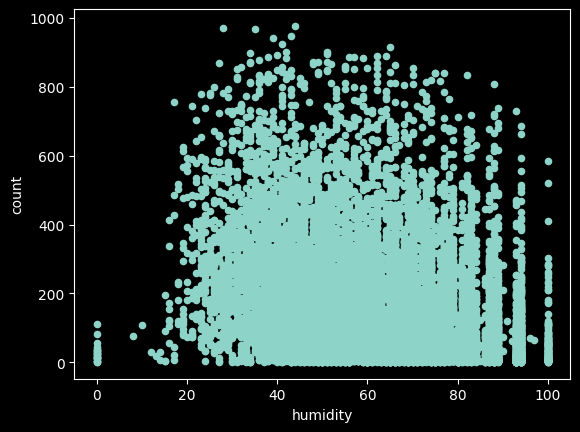

In [10]:
train.plot.scatter(x = 'humidity', y = 'count')# plotting the counts based on humidity

<Axes: xlabel='windspeed', ylabel='count'>

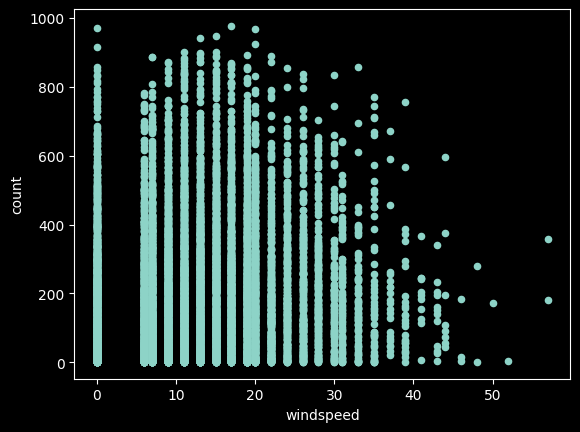

In [11]:
train.plot.scatter(x = 'windspeed', y = 'count') # plotting the counts based on windspeed

<Axes: xlabel='casual', ylabel='count'>

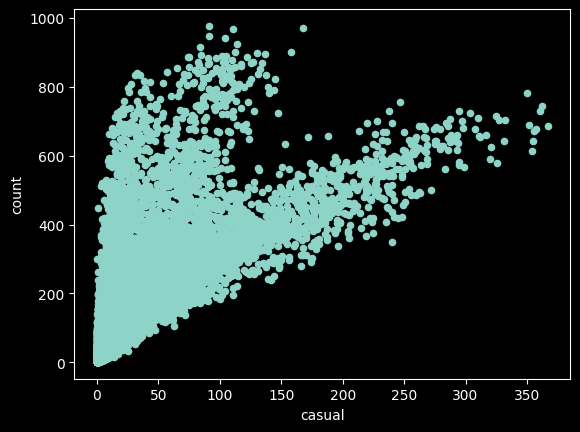

In [12]:
train.plot.scatter(x = 'casual', y = 'count')# plotting the counts based casual user

In [13]:

train.info() # observing the data types of the columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [14]:
train.describe() # Generate descriptive statistics that summarize the central tendency,dispersion and shape of a dataset's distribution

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [15]:
test = pd.read_csv('test_bikes.csv') # loading the test data

In [16]:
test.head()  #looking at the 1st 5 rows of the test data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [17]:
test.tail() # last 5 rows of the test data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981
6492,2012-12-31 23:00:00,1,0,1,1,10.66,13.635,65,8.9981


In [18]:
test.info() # observing the data types of the columns for test data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [19]:
test.describe() # Generate descriptive statistics that summarize the central tendency,dispersion and shape of a dataset's distribution for test data

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


In [17]:
# installing the pandas profiling library. It is used for a deeper understanding than the normal Dataframe.describe() method
!pip install pandas-profiling

Defaulting to user installation because normal site-packages is not writeable
  Using cached pandas_profiling-3.6.6-py2.py3-none-any.whl (324 kB)
  Using cached ydata_profiling-4.5.1-py2.py3-none-any.whl (357 kB)
  Using cached ImageHash-4.3.1-py2.py3-none-any.whl (296 kB)
  Using cached multimethod-1.9.1-py3-none-any.whl (10 kB)
  Using cached phik-0.12.3-cp310-cp310-win_amd64.whl (663 kB)
  Using cached visions-0.7.5-py3-none-any.whl (102 kB)
  Using cached dacite-1.8.1-py3-none-any.whl (14 kB)
  Using cached wordcloud-1.9.2-cp310-cp310-win_amd64.whl (152 kB)
  Using cached PyWavelets-1.4.1-cp310-cp310-win_amd64.whl (4.2 MB)
  Using cached networkx-3.1-py3-none-any.whl (2.1 MB)



[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
from pandas_profiling import ProfileReport

C:\Users\nasir\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\nasir\AppData\Local\Temp\ipykernel_8468\2274191625.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [20]:
profile_report = train.profile_report()
profile_report.to_file(output_file="train_bikes_profilereport.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 64.01it/s]


In [20]:
print("count samples & features: ", train.shape) # printing the number of rows and columns
print("Are there missing values: ", train.isnull().values.any()) # printing if dataset has any NaN value


count samples & features:  (10886, 12)
Are there missing values:  False


In [74]:
train['month'] = train['datetime'].dt.month # extracting the month from the datetime column
train['year'] = train['datetime'].dt.year # extracting the year from the datetime column
train['hour'] = train['datetime'].dt.hour # extracting the hour from the datetime column
train['day'] = train['datetime'].dt.day # extracting the day from the datetime column

In [75]:
train.head() # looking at the 1st 5 rows of the train data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,year,hour,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,2011,0,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,2011,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2011,2,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,2011,3,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,2011,4,1


In [76]:
# drop datetime column as we have extracted the month, year, hour and day from it
train.drop('datetime', axis=1, inplace=True)

In [77]:
train.workingday.unique() # looking at the unique values of workingday column

array([0, 1], dtype=int64)

In [78]:
train.year.unique() # looking at the unique values of year column

array([2011, 2012])

In [79]:
train.hour.unique() # looking at the unique values of hour column

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

<Axes: title={'center': 'Year = 2012'}, xlabel='hour'>

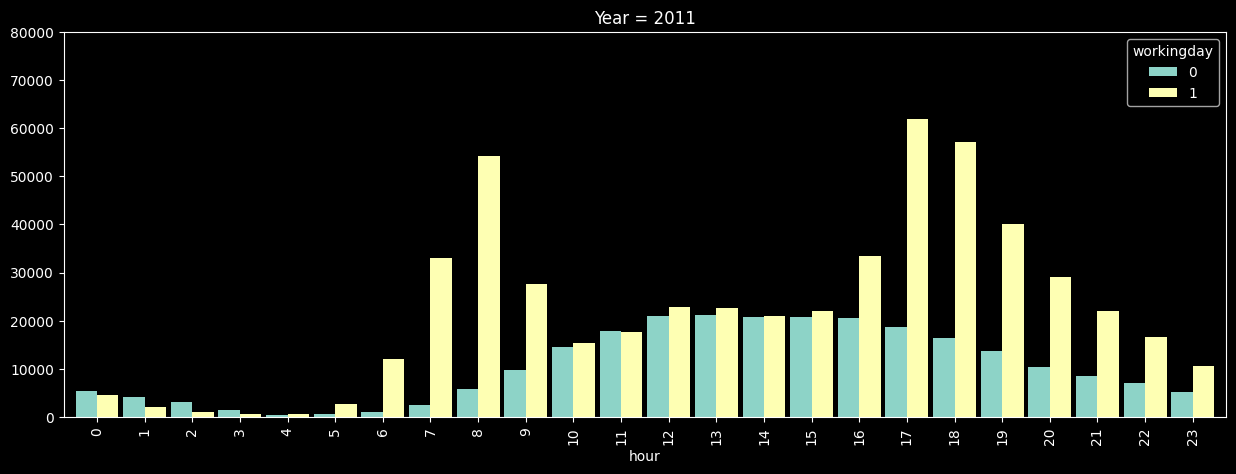

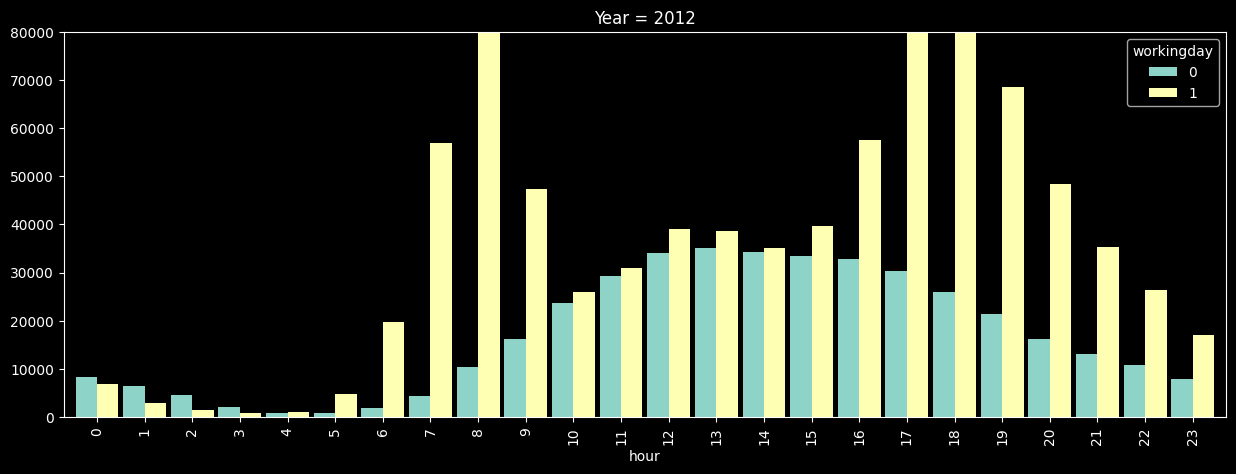

In [39]:
# method for creating the count plot based on hour for a given year 
def plot_by_hour(data, year=None, agg='sum'):
    dd = data
    if year != None:
        dd = dd[dd['year'] == year] # filtering the data based on the year
    by_hour = dd.groupby(['hour', 'workingday'])['count'].agg(agg).unstack() # groupby hour and working day
    return by_hour.plot(kind='bar', ylim=(0, 80000), figsize=(15,5), width=0.9, title="Year = {0}".format(year)) # returning the figure grouped by hour


plot_by_hour(train, year=2011) # plotting the count plot based on hour for 2011 
plot_by_hour(train, year=2012) # plotting the count plot based on hour for 2012

<Axes: title={'center': 'Rent bikes per day in 2011 and 2012'}, xlabel='day'>

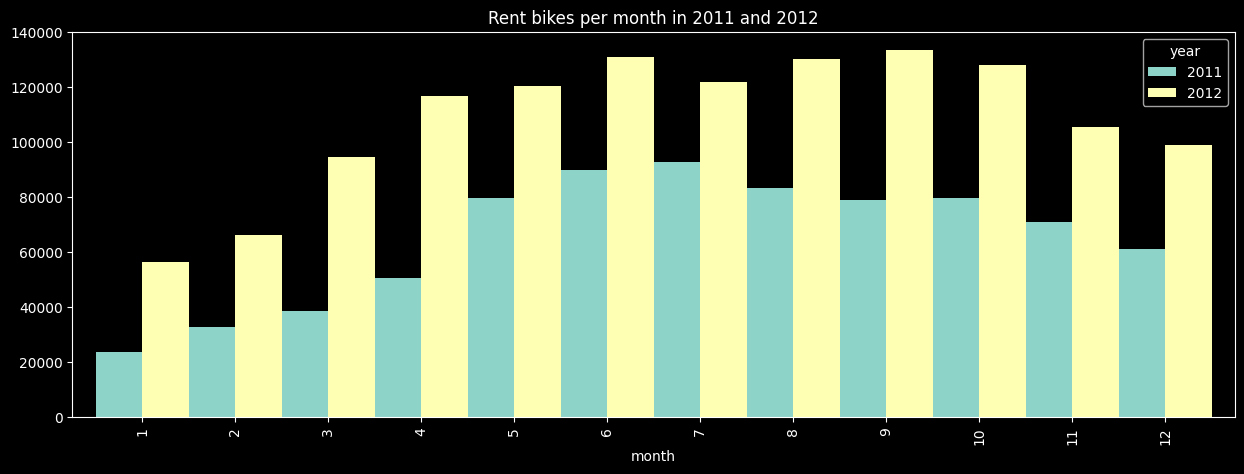

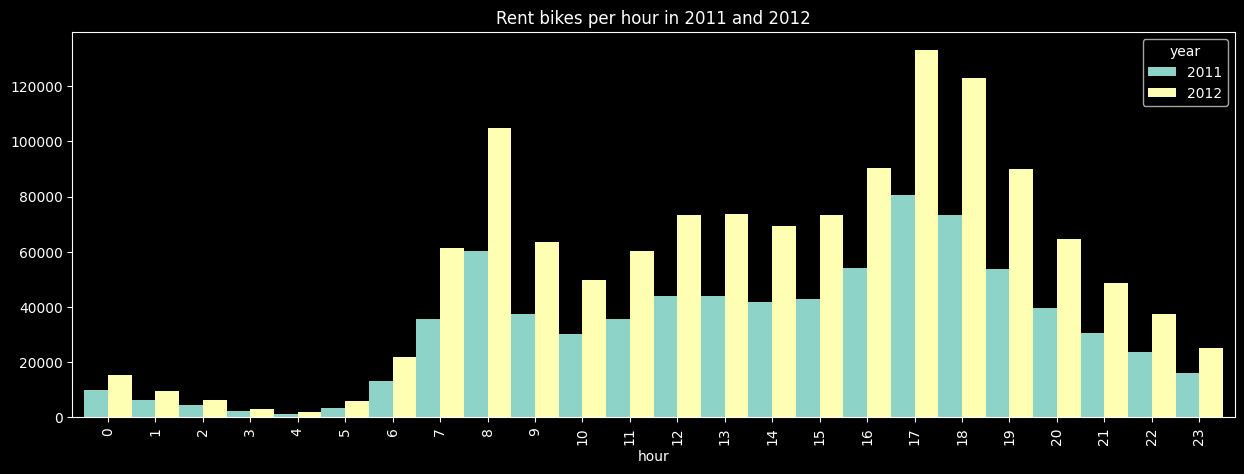

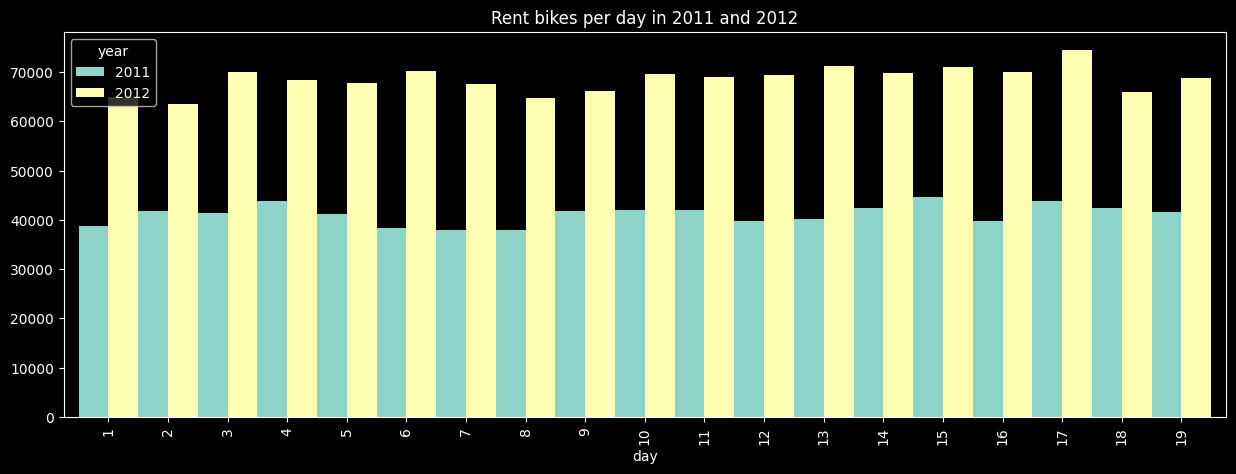

In [42]:
# method for creating the count plot based on year 
def plot_by_year(agg_attr, title):
    # extracting the required fields
    dd = train.copy()
    
    by_year = dd.groupby([agg_attr, 'year'])['count'].agg('sum').unstack() # groupby year
    return by_year.plot(kind='bar', figsize=(15,5), width=1, title=title) # returning the figure grouped by year


plot_by_year('month', "Rent bikes per month in 2011 and 2012") # plotting monthly bike rentals based on year
plot_by_year('hour', "Rent bikes per hour in 2011 and 2012") # plotting hourls bike rentals based  on year
plot_by_year('day', "Rent bikes per day in 2011 and 2012") # plotting hourls bike rentals based  on year


In [51]:
# method to plot a graph for count per hour
def plot_hours(data, message = ''):
    dd = data.copy()
    dd['hour'] = data.hour # extratcing the hour
    
    hours = {}
    for hour in range(24):
        hours[hour] = dd[ dd.hour == hour ]['count'].values

    plt.figure(figsize=(20,10))
    plt.ylabel("Count rent")
    plt.xlabel("Hours")
    plt.title("count vs hours\n" + message)
    plt.boxplot( [hours[hour] for hour in range(24)] )
    
    axis = plt.gca()
    axis.set_ylim([1, 1100])
 

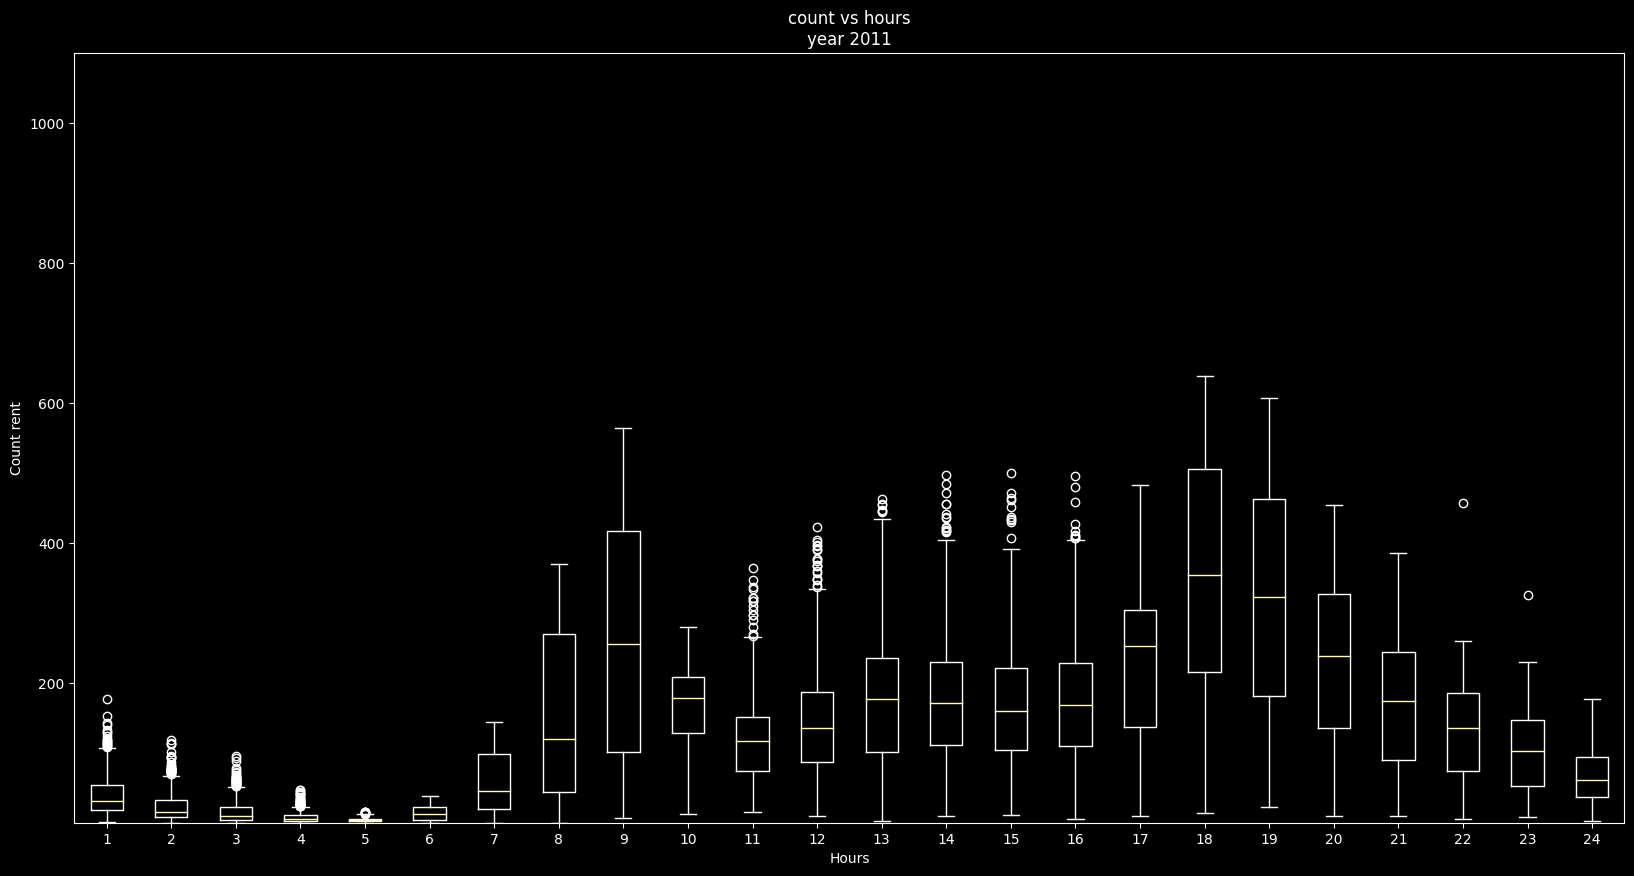

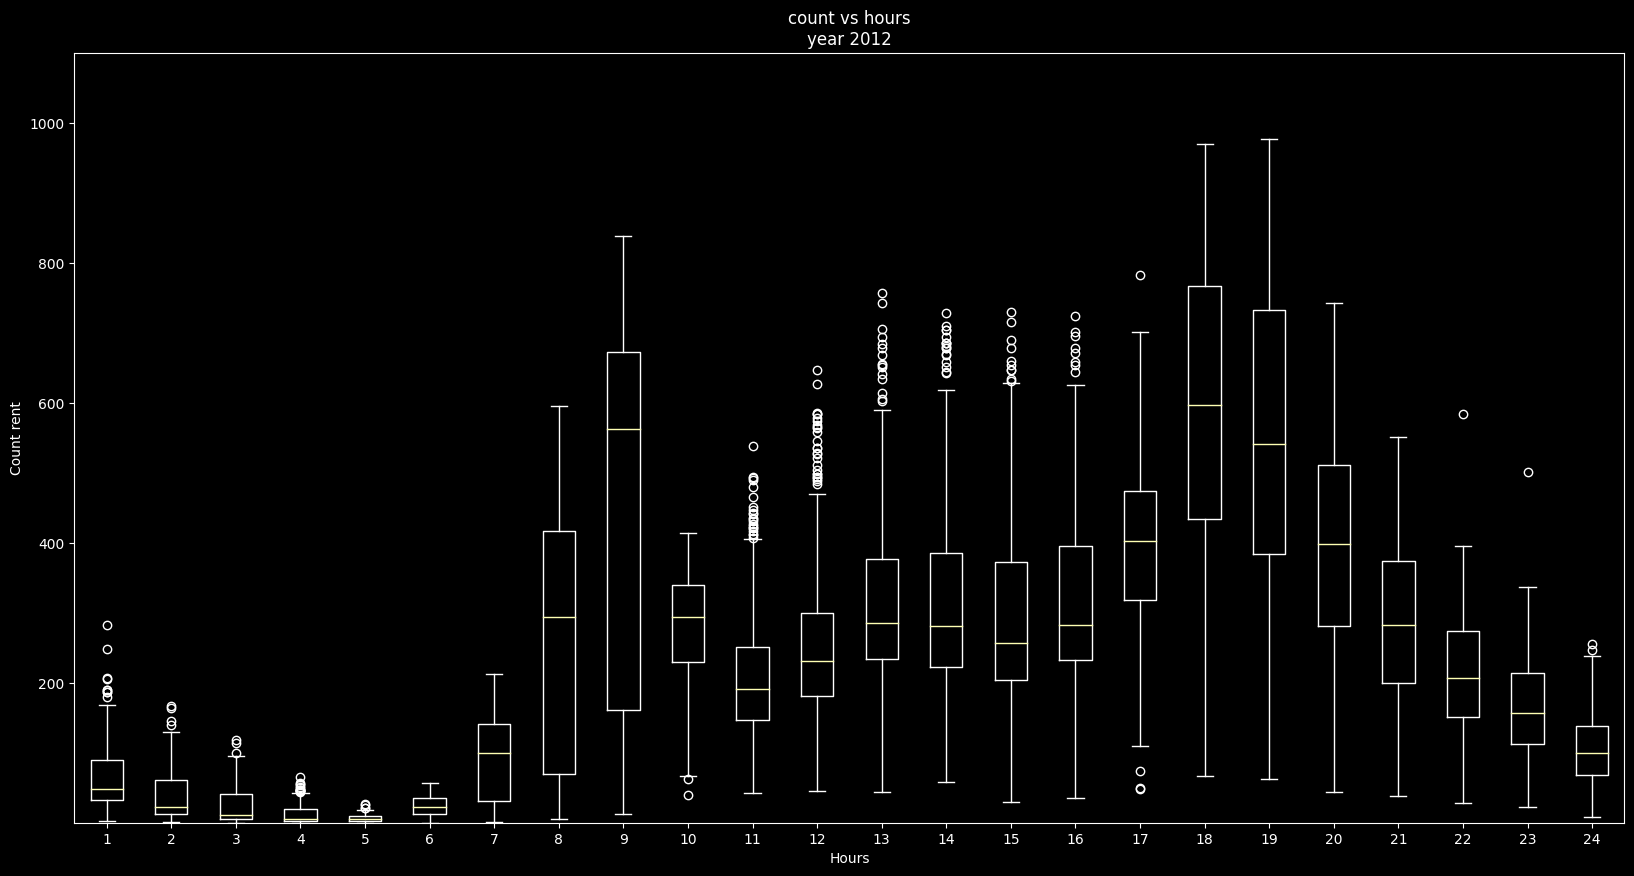

In [52]:
plot_hours( train[train.year == 2011], 'year 2011') # box plot for hourly count for the mentioned year
plot_hours( train[train.year == 2012], 'year 2012') # box plot for hourly count for the mentioned year

In [66]:
dt_test = pd.to_datetime(test["datetime"]) # converting the column to datetime for test dataset
test["hour"] = dt_test.map(lambda x: x.hour) # adding the hour column for test dataset
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,4


In [67]:
test.hour.unique() # looking at the unique values of hour column for test dataset

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

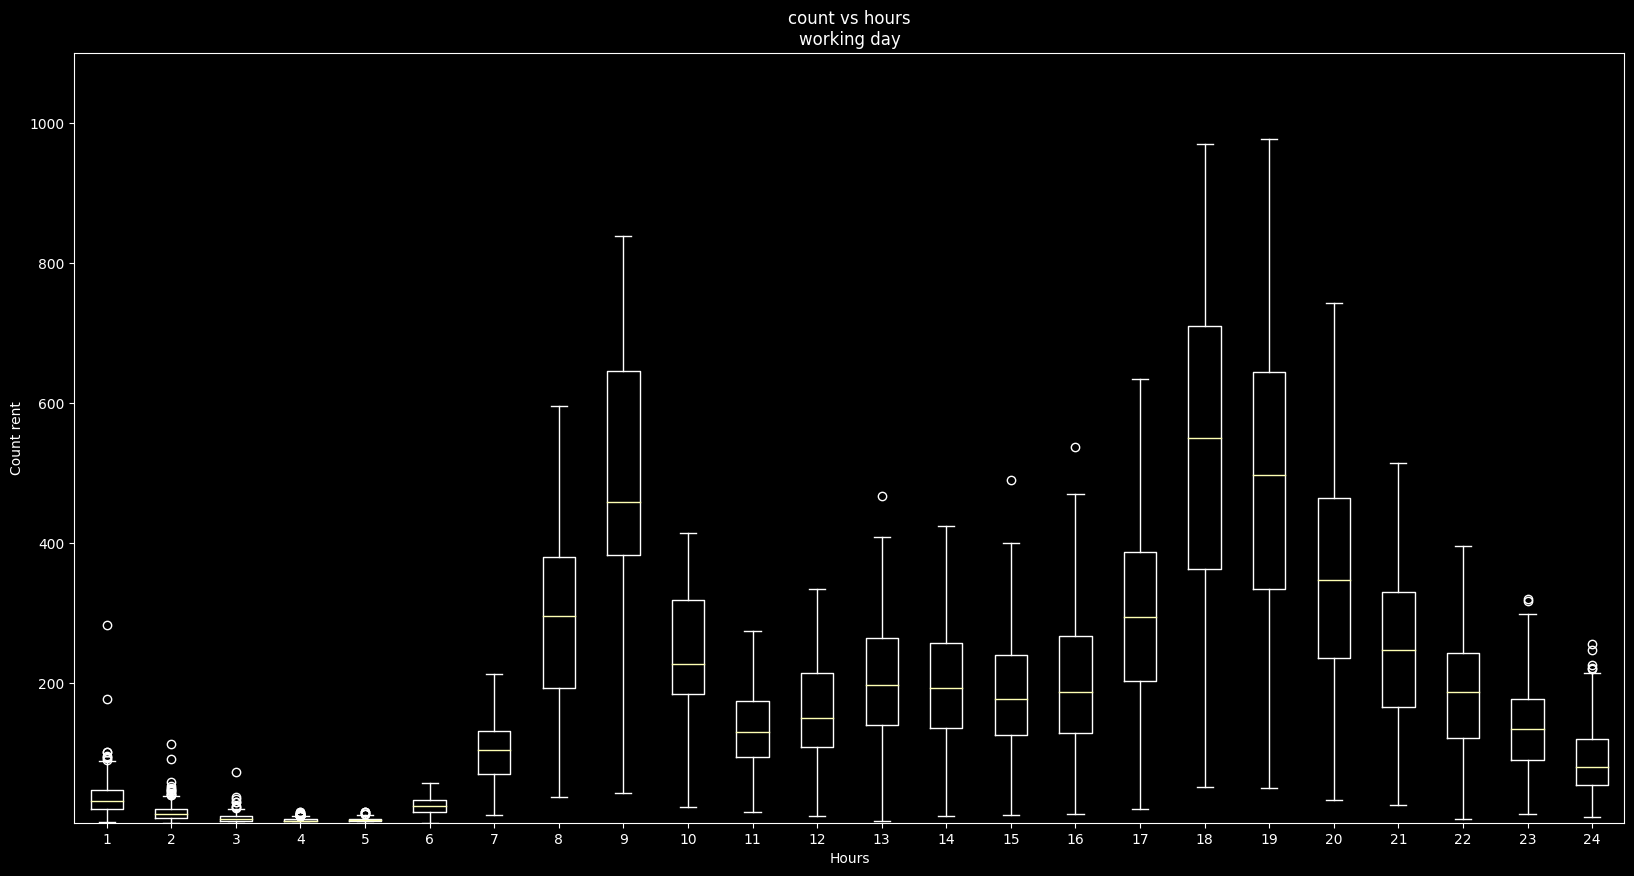

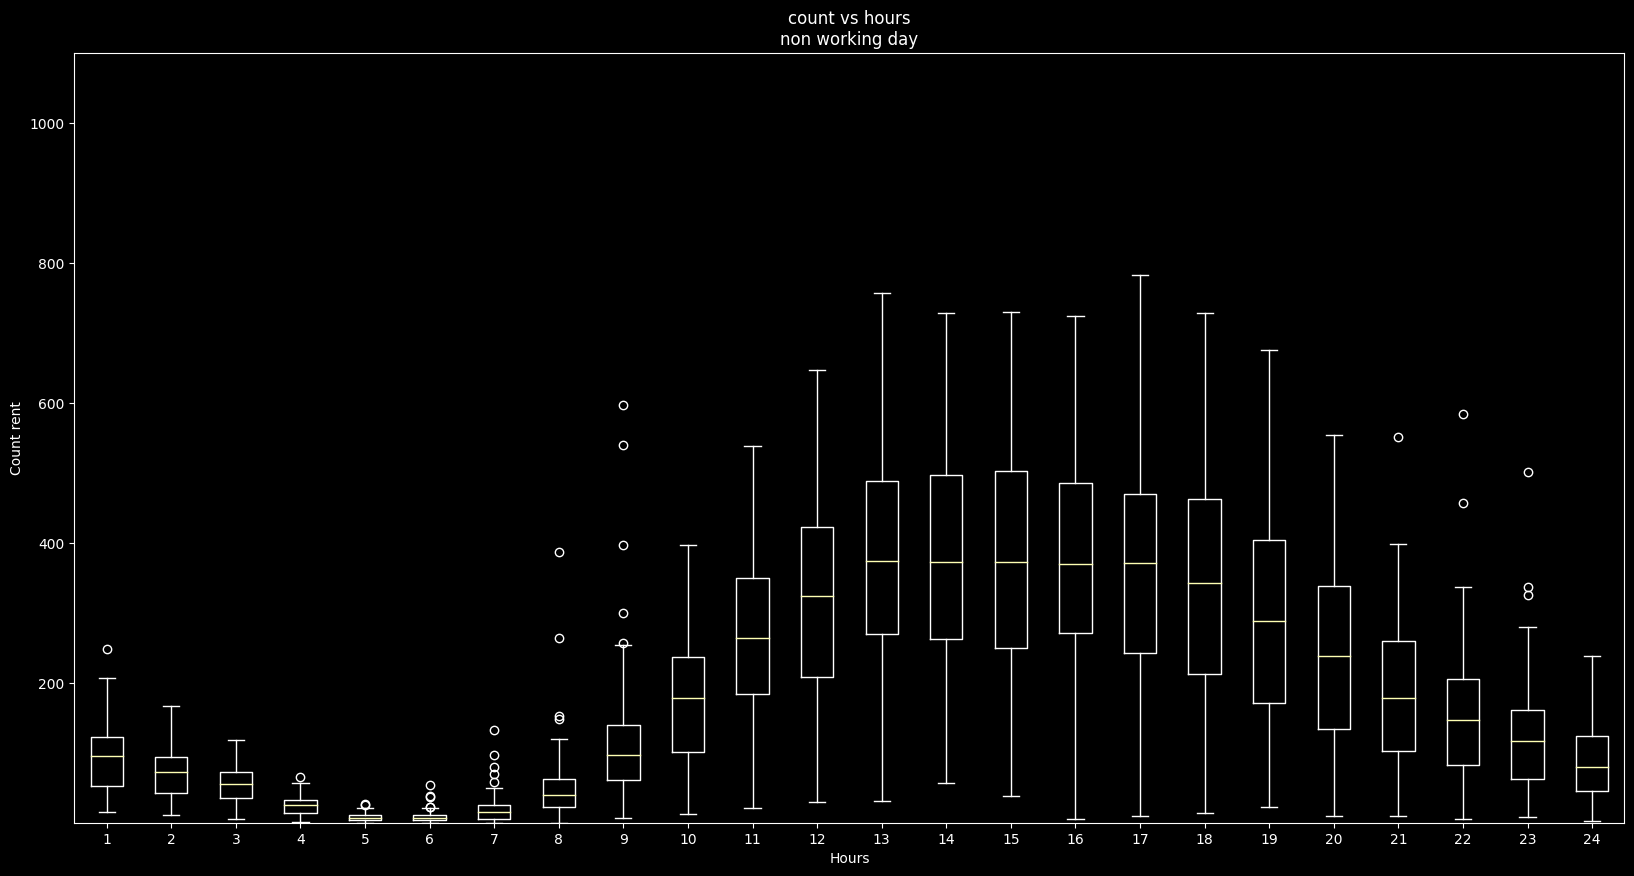

In [55]:

plot_hours( train[train.workingday == 1], 'working day') # plotting hourly count of rented bikes for working days for a given year
plot_hours( train[train.workingday == 0], 'non working day') # plotting hourly count of rented bikes for non-working days for a given year

In [80]:
# method to convert categorical data to numerical data
def categorical_to_numeric(x):
    if 0 <=  x < 6:
        return 0
    elif 6 <= x < 13:
        return 1
    elif 13 <= x < 19:
        return 2
    elif 19 <= x < 24:
        return 3

In [81]:
train['hour'] = train['hour'].apply(categorical_to_numeric)# applying the above conversion logic to training data
train.head()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,year,hour,day
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,2011,0,1
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,2011,0,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2011,0,1
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,2011,0,1
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,2011,0,1


In [82]:
train.hour.unique() # looking at the unique values of hour column for training dataset

array([0, 1, 2, 3], dtype=int64)

In [69]:
test['hour'] = test['hour'].apply(categorical_to_numeric) # applying the above conversion logic to test data
test.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,0


In [70]:
test.hour.unique() # looking at the unique values of hour column for test dataset

array([0, 1, 2, 3], dtype=int64)

In [83]:
# drop unnecessary columns

test = test.drop(['datetime'], axis=1)

In [61]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,year,hour,day
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,2011,0,1
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,2011,0,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2011,0,1
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,2011,0,1
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,2011,0,1


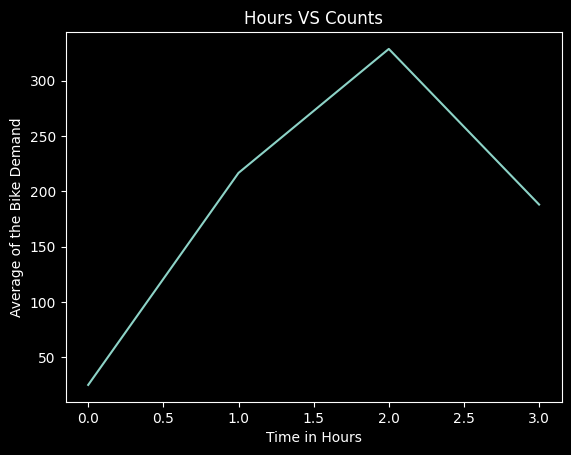

In [87]:
# an Hour vs Count Graph depicting average bike demand based on the hour 
train.groupby('hour').agg('mean')['count'].plot() # plotting the graph for average bike demand based on the hour
plt.title('Hours VS Counts')
plt.xlabel('Time in Hours')
plt.ylabel('Average of the Bike Demand')
plt.show()

In [88]:
train.hour.unique() # looking at the unique values of hour column

array([0, 1, 2, 3], dtype=int64)

<Axes: xlabel='temp'>

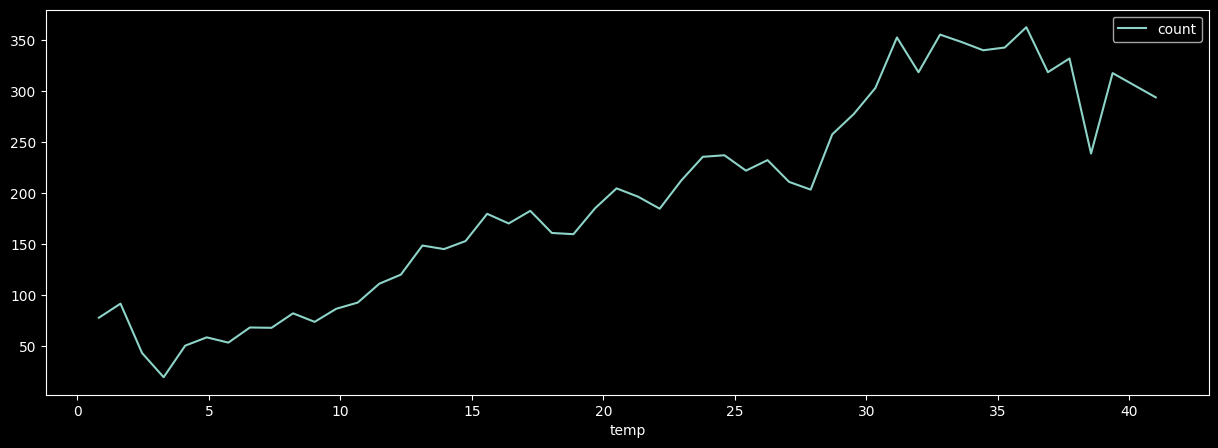

In [92]:
# count of different temp values
a = train.groupby('temp')[['count']].mean().plot(figsize=(15,5)) # plotting the graph for average bike demand based on the temp
a

In [93]:
a.plot()
plt.show()

<Axes: xlabel='atemp'>

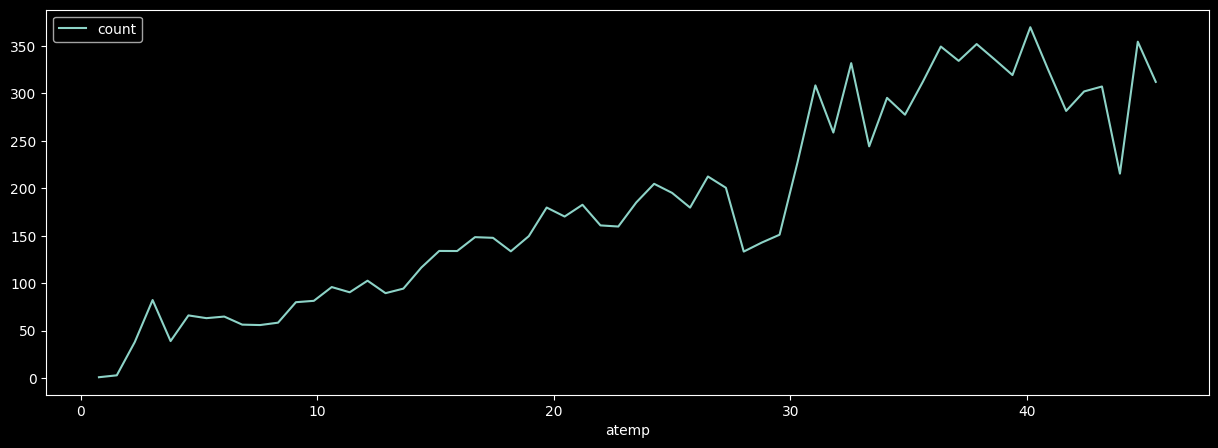

In [95]:
# count of different atemp values
a = train.groupby('atemp')[['count']].mean().plot(figsize=(15,5)) # plotting the graph for average bike demand based on the atemp
a

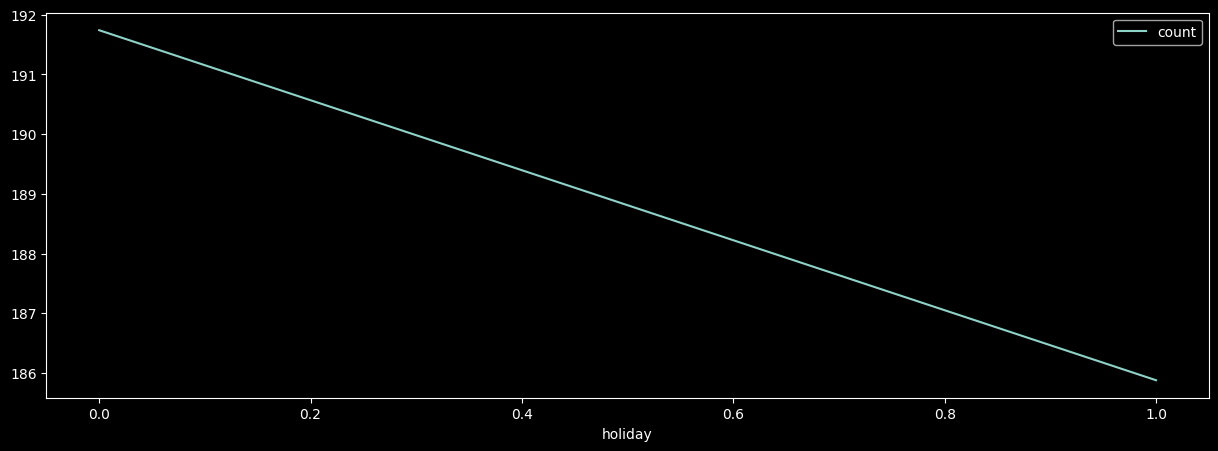

In [96]:
# count based on holiday
a = train.groupby('holiday')[['count']].mean().plot(figsize=(15,5)) # plotting the graph for average bike demand based on the holiday


In [97]:
# method to  select the features. If a feature is not in the blaklist, it gets selected
def select_features(data):
    black_list = ['casual', 'registered', 'count', 'is_test', 'datetime', 'count_log']
    return [feat for feat in data.columns if feat not in black_list]


In [98]:
select_features(train) # calling the method to select the features

'''
>>> It defines a black_list which is a list of feature names that you want to exclude from the selection.

>>> It uses a list comprehension to iterate over the columns of the DataFrame data.

>>> For each feature name (feat) in the DataFrame's columns, it checks if that feature name is not in the black_list. If it's not in the black_list, the feature name is included in the list of selected features.

>>> The function returns the list of selected features, which are those not present in the black_list.'''

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'month',
 'year',
 'hour',
 'day']

In [103]:
train.head() # looking at the 1st 5 rows of the train data

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,year,hour,day
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,2011,0,1
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,2011,0,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2011,0,1
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,2011,0,1
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,2011,0,1


In [113]:
# create train and test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train.drop(['count', 'casual', 'registered'], axis=1), train['count'], test_size=0.2, random_state=42)



In [122]:
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor

# Define your rmsle function if it's not already defined
# ...

def _simple_modeling(X_train, X_test, y_train, y_test):
    # Specifying the model names
    models = [
        ('dummy-mean', DummyRegressor(strategy='mean')),
        ('dummy-median', DummyRegressor(strategy='median')),
        ('random-forest', RandomForestRegressor(random_state=0)),
    ]
    
    results = []

    for name, model in models:
        model.fit(X_train, y_train)  # Fitting the training data to the model
        y_pred = model.predict(X_test)  # Doing predictions using the model
        
        results.append((name, y_test, y_pred))  # Creating the list of predictions from various models
        
    return results

# A method to return the performance metric of the model used in the above method
def simple_modeling(X_train, X_test, y_train, y_test):
    results = _simple_modeling(X_train, X_test, y_train, y_test)  # Using the function defined above to calculate the predictions
    
    def rmsle(y_true, y_pred):
        assert len(y_true) == len(y_pred)
        return np.sqrt(np.mean((np.log1p(y_true) - np.log1p(y_pred))**2))
    
    return [(r[0], rmsle(r[1], r[2])) for r in results]  # Returning the performance metrics




'''The code you provided defines two methods for performing and evaluating simple modeling using different regressors:

1. `_simple_modeling`:
   - This function takes training and testing data (`X_train`, `X_test`, `y_train`, `y_test`) as input.
   - It defines a list of models, including a dummy regressor with both mean and median strategies and a random forest regressor.
   - It iterates through the models, fits each model to the training data, and makes predictions on the testing data.
   - The results are stored in a list of tuples, where each tuple contains the model name, the true `y_test`, and the predicted `y_pred`.
   - Finally, it returns the list of results.

2. `simple_modeling`:
   - This function is a wrapper around `_simple_modeling`.
   - It calls `_simple_modeling` to obtain the results, which include the model name, true `y_test`, and predicted `y_pred`.
   - It also calculates a performance metric called `rmsle` (root mean squared logarithmic error) for each model using the true and predicted values.
   - The function returns a list of tuples, where each tuple contains the model name and its corresponding RMSLE score.

Please note that the code refers to a `rmsle` function, which is not defined in the code snippet you provided. You would need to define the `rmsle` function elsewhere in your code or import it from a library.

To use these functions, you would typically provide your training and testing data (`X_train`, `X_test`, `y_train`, `y_test`) as arguments to the `simple_modeling` function and then examine the list of model names and their respective performance scores.'''

'The code you provided defines two methods for performing and evaluating simple modeling using different regressors:\n\n1. `_simple_modeling`:\n   - This function takes training and testing data (`X_train`, `X_test`, `y_train`, `y_test`) as input.\n   - It defines a list of models, including a dummy regressor with both mean and median strategies and a random forest regressor.\n   - It iterates through the models, fits each model to the training data, and makes predictions on the testing data.\n   - The results are stored in a list of tuples, where each tuple contains the model name, the true `y_test`, and the predicted `y_pred`.\n   - Finally, it returns the list of results.\n\n2. `simple_modeling`:\n   - This function is a wrapper around `_simple_modeling`.\n   - It calls `_simple_modeling` to obtain the results, which include the model name, true `y_test`, and predicted `y_pred`.\n   - It also calculates a performance metric called `rmsle` (root mean squared logarithmic error) for ea

In [123]:
simple_modeling(X_train, X_test, y_train, y_test) # calling the method to get the performance metrics

[('dummy-mean', 1.5872370469937478),
 ('dummy-median', 1.4899774001686998),
 ('random-forest', 0.710081499921374)]

 Let's interpret the RMSLE (Root Mean Squared Logarithmic Error) scores for each of the evaluated models:

'dummy-mean' Model:

RMSLE: Approximately 1.5872
Interpretation: This model uses a simple strategy of predicting the mean value of the target variable for all instances. An RMSLE of 1.5872 suggests that this model has a relatively high error, indicating that it performs poorly in capturing the underlying patterns in the data. The predictions are significantly different from the actual values on a logarithmic scale.
'dummy-median' Model:

RMSLE: Approximately 1.4900
Interpretation: Similar to the 'dummy-mean' model, this model uses a simple strategy, but it predicts the median value of the target variable for all instances. The RMSLE of 1.4900 is somewhat lower than the 'dummy-mean' model but still relatively high. It suggests that this model's predictions are closer to the actual values than the 'dummy-mean' model but still not very accurate.
'random-forest' Model:

RMSLE: Approximately 0.7101
Interpretation: The 'random-forest' model is a more sophisticated machine learning model that uses an ensemble of decision trees to make predictions. The lower RMSLE of 0.7101 indicates that this model performs significantly better than the dummy models. It suggests that the predictions made by the 'random-forest' model are much closer to the actual values on a logarithmic scale, indicating a better fit to the data.
In summary, the 'random-forest' model outperforms the dummy models in terms of prediction accuracy, as evidenced by its lower RMSLE. Lower RMSLE values indicate better model performance, and in this case, the 'random-forest' model is the preferred choice for making predictions on the given dataset.

In [128]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
forest_reg = RandomForestRegressor(n_estimators=100) # instantiating the random Forest Regressor

score = cross_val_score(forest_reg, X_train, y_train, cv=4) # calcuating the cross validation score
print (score)


[0.60444158 0.61660636 0.59858686 0.64977763]
